In [2]:
!pip install kagglehub

# Hands On Data Analysis: Vehicle Sales Data
- **Team :** Machine Learning GDGoC : Universitas Sriwijaya
- **Topic :** Manual Data Analysis
- **Notebook Creator :** Aditya Bayhaqie

---

*Please Copy the Notebook before Running it*

---

## Menentukan Pertanyaan Bisnis

- What factors influence vehicle pricing the most? (e.g., mileage, brand, model, condition, year)
- Which car brands/models retain their value best over time?
- What are the most common features & specifications consumers look for in a vehicle?

#### Importing Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime
import kagglehub
from kagglehub import KaggleDatasetAdapter

## Data Wrangling

### Gathering Data

In [4]:
! kaggle datasets download syedanwarafridi/vehicle-sales-data

Dataset URL: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
License(s): MIT
 96% 18.0M/18.8M [00:01<00:00, 22.5MB/s]
100% 18.8M/18.8M [00:01<00:00, 13.7MB/s]


In [5]:
! unzip vehicle-sales-data.zip # Any Prediction type Competition

Archive:  vehicle-sales-data.zip
  inflating: car_prices.csv          


#### Assigning Data Variables

In [6]:
df_data = pd.read_csv("/content/car_prices.csv")
df_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Data Assesment

#### Assessing Data

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
df_data.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [29]:
df_data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [9]:
print("Data Duplikat : ",df_data.duplicated().sum())

Data Duplikat :  0


####Analysis with Visualization

Analisis ini digunakan untuk
- Mengecek Konten dari tiap Kolum pada Dataset
- Menganalisa Persebaran data pada tiap Kolum

######Year

Data Normal, Tidak perlu modifikasi

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64


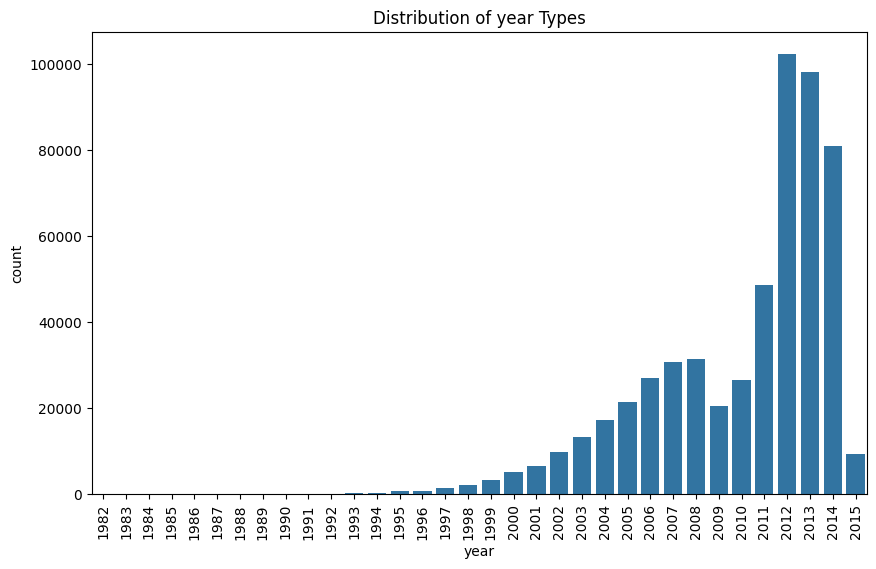

In [10]:
# Frequency Analysis
print(df_data['year'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df_data)
plt.title('Distribution of year Types')
plt.xticks(rotation=90)
plt.show()

######Creator

Data Normal, Tidak perlu modifikasi

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64


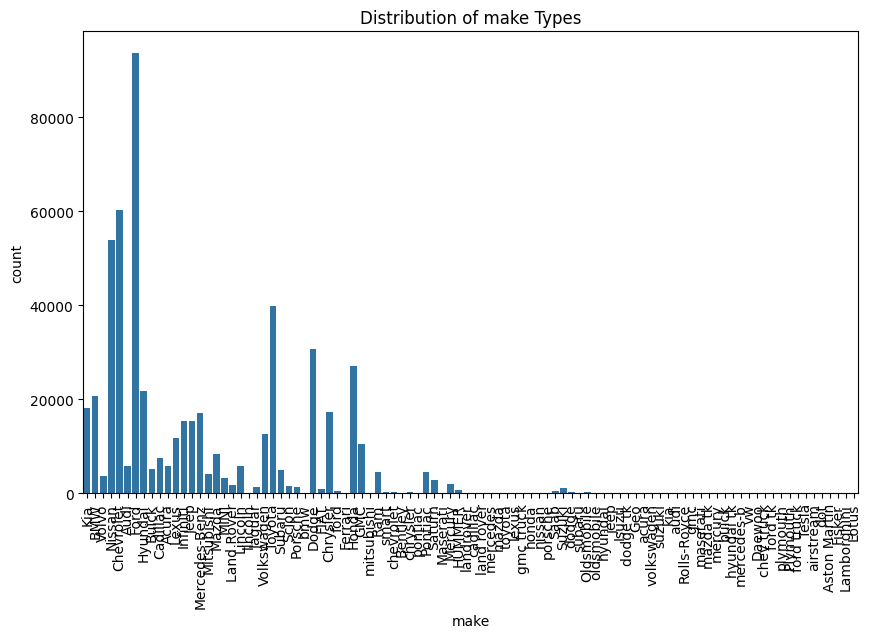

In [ ]:
# Frequency Analysis
print(df_data['make'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=df_data)
plt.title('Distribution of make Types')
plt.xticks(rotation=90)
plt.show()

######Model

Data Normal, Tidak perlu modifikasi

In [13]:
# Frequency Analysis
print(df_data['model'].value_counts())

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64


######Trim

Data Normal, Tidak perlu modifikasi

In [17]:
# Frequency Analysis
print(df_data['trim'].value_counts())

trim
Base                 55817
SE                   43648
LX                   20757
Limited              18367
LT                   16915
                     ...  
xls                      1
series m                 1
4x2 reg silverado        1
4x2 v6 limited           1
Power Wagon              1
Name: count, Length: 1963, dtype: int64


######Body

Data Normal, Tidak perlu modifikasi

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64


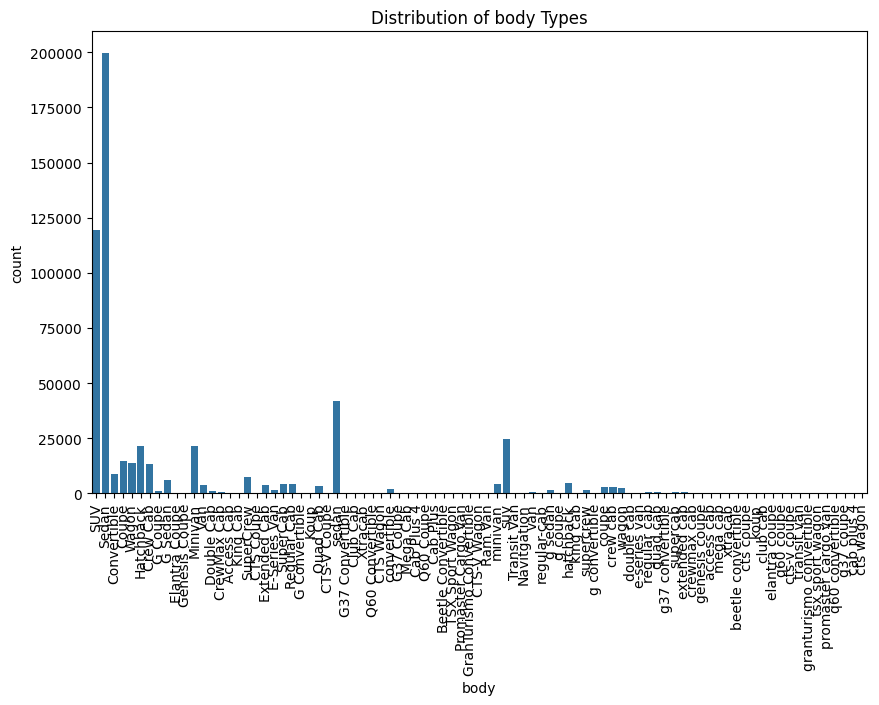

In [ ]:
# Frequency Analysis
print(df_data['body'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='body', data=df_data)
plt.title('Distribution of body Types')
plt.xticks(rotation=90)
plt.show()

######Transmission
Terdapat Anomali Data, cek Row dan Cell Terkait

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64


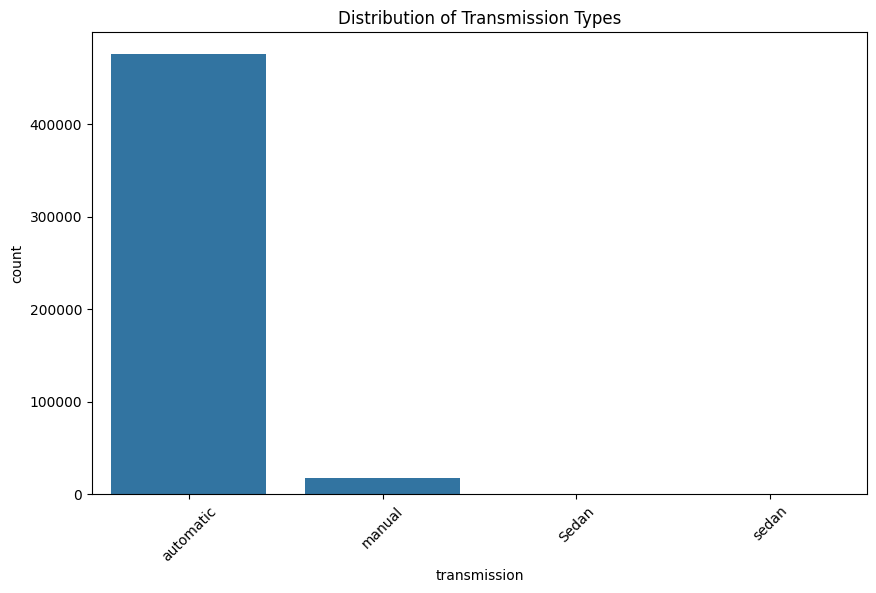

In [ ]:
# Frequency Analysis
print(df_data['transmission'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_data)
plt.title('Distribution of Transmission Types')
plt.xticks(rotation=45)
plt.show()

######Vin
Terdapat Anomali Data, cek Row dan Cell Terkait

In [16]:
# Frequency Analysis
print(df_data['vin'].value_counts())

vin
automatic            22
wbanv13588cz57827     5
5uxfe43579l274932     4
trusc28n241022003     4
wddgf56x78f009940     4
                     ..
1p3ew65g7yv603989     1
4t1bf28b1yu016829     1
jtdbt1231y0082703     1
jtddr32t8y0063746     1
1ftfw1et2eke87277     1
Name: count, Length: 550297, dtype: int64


######State
Terdapat Anomali Data, cek Row dan Cell Terkait

state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64


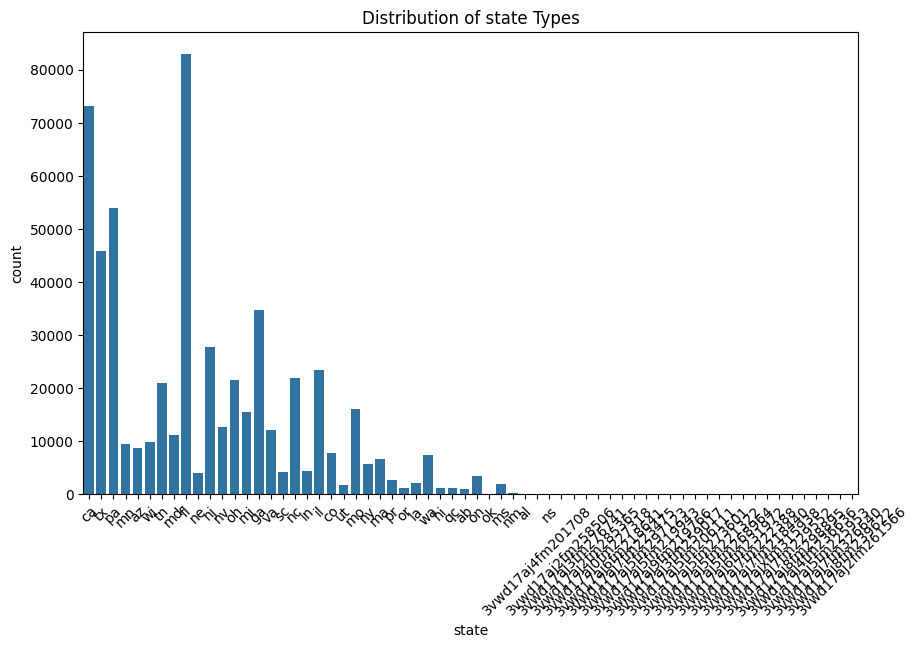

In [ ]:
# Frequency Analysis
print(df_data['state'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df_data)
plt.title('Distribution of state Types')
plt.xticks(rotation=45)
plt.show()

######Condition
Terdapat Anomali Data, cek Row dan Cell Terkait

condition
19.0    42281
35.0    26750
37.0    25938
44.0    25514
43.0    24937
42.0    24328
36.0    23144
41.0    23073
2.0     20790
4.0     19922
39.0    19920
28.0    19178
29.0    18928
38.0    18723
34.0    17398
27.0    16351
49.0    13099
48.0    12712
46.0    12634
25.0    12561
45.0    12313
26.0    11912
47.0    11363
5.0     11222
3.0     10803
33.0    10619
32.0     9962
24.0     9326
31.0     9222
21.0     9199
23.0     8188
1.0      7364
22.0     6057
18.0      323
17.0      243
16.0      178
15.0      144
14.0      134
12.0       95
11.0       87
13.0       82
Name: count, dtype: int64


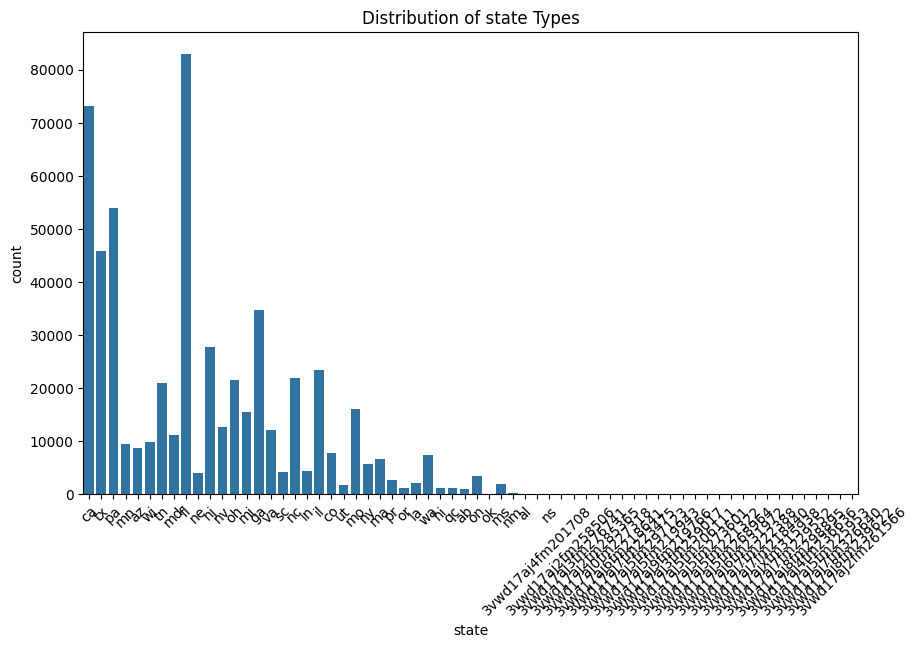

In [18]:
# Frequency Analysis
print(df_data['condition'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df_data)
plt.title('Distribution of state Types')
plt.xticks(rotation=45)
plt.show()

######Odometer
Terdapat Anomali Data, cek Row dan Cell Terkait

In [20]:
# Frequency Analysis
print(df_data['odometer'].value_counts())

odometer
1.0         1318
999999.0      72
10.0          29
21587.0       21
29137.0       18
            ... 
84791.0        1
184061.0       1
113144.0       1
201099.0       1
262065.0       1
Name: count, Length: 172278, dtype: int64


######Color
Terdapat Anomali Data, cek Row dan Cell Terkait

In [21]:
# Frequency Analysis
print(df_data['color'].value_counts())

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64


######Interior
Data Normal, Tidak perlu modifikasi

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64


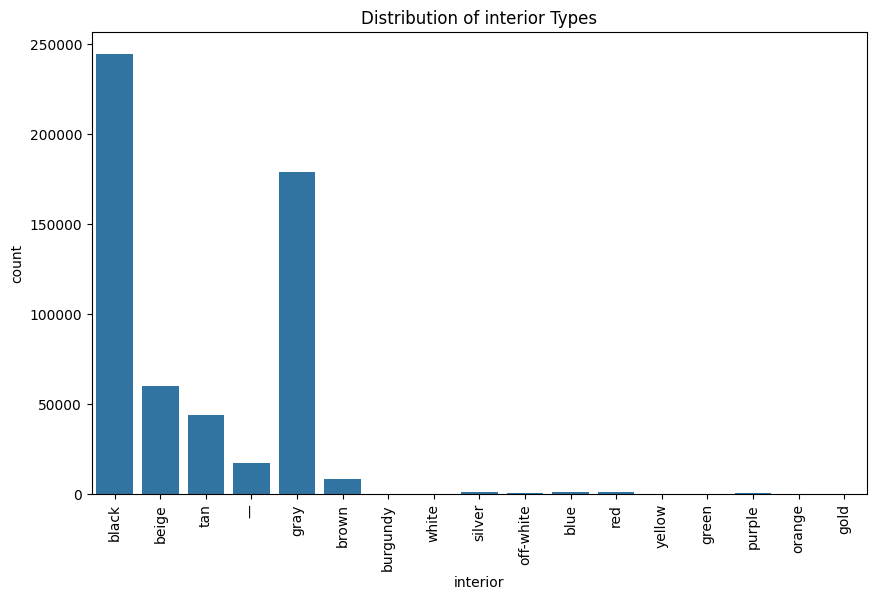

In [22]:
# Frequency Analysis
print(df_data['interior'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='interior', data=df_data)
plt.title('Distribution of interior Types')
plt.xticks(rotation=90)
plt.show()

######Seller
Data Normal, Tidak perlu modifikasi

In [24]:
# Frequency Analysis
print(df_data['seller'].value_counts())

seller
nissan-infiniti lt               19693
ford motor credit company llc    19162
the hertz corporation            18299
santander consumer               15285
avis corporation                 12540
                                 ...  
whitney motor company                1
auto max sales inc                   1
lscg fund 19 llc                     1
lexus of santa fe                    1
i -5 uhlmann rv                      1
Name: count, Length: 14263, dtype: int64


######MMR
Data Normal, Tidak perlu modifikasi

In [25]:
# Frequency Analysis
print(df_data['mmr'].value_counts())

mmr
12500.0     1761
11600.0     1751
11650.0     1746
12150.0     1722
11850.0     1717
            ... 
172000.0       1
134000.0       1
113000.0       1
154000.0       1
164000.0       1
Name: count, Length: 1101, dtype: int64


######Selling Price
Data Normal, Tidak perlu modifikasi

In [26]:
# Frequency Analysis
print(df_data['sellingprice'].value_counts())

sellingprice
11000.0     4453
12000.0     4450
13000.0     4334
10000.0     4029
14000.0     3899
            ... 
28350.0        1
30201.0        1
131500.0       1
31550.0        1
27840.0        1
Name: count, Length: 1887, dtype: int64


######Date
Data Normal, Tidak perlu modifikasi

In [28]:
# Frequency Analysis
print(df_data['saledate'].value_counts())

saledate
Tue Feb 10 2015 01:30:00 GMT-0800 (PST)    5334
Tue Feb 17 2015 01:30:00 GMT-0800 (PST)    5016
Tue Jan 27 2015 01:30:00 GMT-0800 (PST)    4902
Tue Jan 20 2015 01:30:00 GMT-0800 (PST)    4731
Tue Mar 03 2015 01:30:00 GMT-0800 (PST)    4653
                                           ... 
Thu Feb 05 2015 05:10:00 GMT-0800 (PST)       1
Thu Jan 02 2014 09:30:00 GMT-0800 (PST)       1
Tue Apr 28 2015 05:50:00 GMT-0700 (PDT)       1
Wed Jan 21 2015 05:45:00 GMT-0800 (PST)       1
Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)       1
Name: count, Length: 3766, dtype: int64


##### Separate Duplicate Checking
Guna memastikan tidak ada Duplikasi terutama pada VIN (Vehicle Identification Number)

In [ ]:
df_data['vin'].duplicated().sum()

8539

### Data Cleaning

#### Order Payments Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Sellers Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Product Category Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

## Exploratory Data Analysis (EDA)

### Explore Datasets

In [ ]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
geoloc_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Creating Clearer City Latitude and Longitude**

In [ ]:
geoloc_df.groupby(by="geolocation_city").agg({
    "geolocation_lat": ["max", "min", "mean", "std"],
    "geolocation_lng": ["max", "min", "mean", "std"]
})

geolocation_lat                                  \
                               max        min       mean       std   
geolocation_city                                                     
* cidade                -25.571748 -25.571748 -25.571748       NaN   
...arraial do cabo      -22.969370 -22.969370 -22.969370       NaN   
4o. centenario          -24.271860 -24.271860 -24.271860       NaN   
4º centenario           -24.277697 -24.281905 -24.279801  0.002976   
abadia de goias         -16.756821 -16.789539 -16.767063  0.009978   
...                            ...        ...        ...       ...   
áurea                   -27.692454 -27.697565 -27.695009  0.003614   
ângulo                  -23.193593 -23.198309 -23.195024  0.002241   
érico cardoso           -13.393047 -13.393047 -13.393047       NaN   
óbidos                   -1.897693  -1.917688  -1.907183  0.005624   
óleo                    -22.937454 -22.944293 -22.940222  0.003242   

                   geolocation_lng                                  
                               max        min       mean       std  
geolocation_city                                                    
* cidade                -49.334374 -49.334374 -49.334374       NaN  
...arraial do cabo      -42.029834 -42.029834 -42.029834       NaN  
4o. centenario          -53.069433 -53.069433 -53.069433       NaN  
4º centenario           -53.074516 -53.074930 -53.074723  0.000293  
abadia de goias         -49.426674 -49.469430 -49.438089  0.013241  
...                            ...        ...        ...       ...  
áurea                   -52.054195 -52.055957 -52.055076  0.001246  
ângulo                  -51.916100 -51.918154 -51.917294  0.001030  
érico cardoso           -42.134282 -42.134282 -42.134282       NaN  
óbidos                  -55.510995 -55.524011 -55.516370  0.003631  
óleo                    -49.336995 -49.343426 -49.339676  0.002987  

[8011 rows x 8 columns]

**Data Conclusion :**
- I able to Analyze from this data some Latitude and Longitude from the city, it also helps to Predict the size of the city if our data is more detailed

**Examining Customer City and State**

In [ ]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Data Conclusion :**
- We are able to see our Customer location and determining the most City and State our customer are appeared

**Exploring for Delay in Product Delivery**

In [ ]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

# Calculate the difference in days
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

# Filter to only delivered orders
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']

# Summary of delay (negative means delivered earlier, positive means delayed)
delivery_summary = delivered_orders['delivery_delay'].describe()
print(delivery_summary)

count    96470.000000
mean       -11.875889
std         10.182105
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64


**Data Conclusion :**
- From this data, i can conclude that we can see the Highest and Lowest Delay in our Product Delivery and this needs to be Improved because the range is so big

**Tracing Shipped Product trough Orders then to Customer ID**

In [ ]:
# Filter the orders_df for orders with status 'shipped'
shipped_orders = orders_df[orders_df['order_status'] == 'shipped']

# Get the customer_id from the shipped orders
shipped_customer_ids = shipped_orders['customer_id'].tolist()

# Merge with customers_df to get the customer_city for those customers
shipped_customers_df = customer_df[customer_df['customer_id'].isin(shipped_customer_ids)]

# Display relevant columns (customer_id and customer_city)
result = shipped_customers_df[['customer_id', 'customer_city']]

# Show the result
print(result)

                            customer_id   customer_city
70     4c7241af24b5344cb01fe687643de4fe       fortaleza
79     f6529ffebe6b3440d45d89604a4239ac     nova iguacu
100    ae76a4650235ab18764708174f1da31e       sao paulo
113    8891eb5ca0e28df961b2b5b8f3c0eb23       sao paulo
224    265655cf1f2dfd4fc630004d1fe5f3cb     hortolandia
...                                 ...             ...
99084  7fa80efb1ef15ca4104627910c29791c        camacari
99248  6a65b5d6d4f4c9dfda93798cf014ee47       sao paulo
99280  9ce70b8dafe76524f3d5e5e68cbf29f5  ribeirao preto
99288  2a6fc1968c4a29c9c258bb1994afbc7f   volta redonda
99351  f83083fcbc51d12f8279b5713c2d4b4d       araguaina

[1107 rows x 2 columns]


**Data Conclusion :**
- This system Helps us to track shipped product that still not on Our customer hand, so we can see the delivery they will go

**Final Insight:**
- By Defining City Longitude and Langitude, i able to Calculate the City Size
- By Examining Customer City and State, it will help me to Taking Conclusion for the Most Highest Customer by City or State
- Upon Exploring Delay of Shipment, i found out that some delivery will be Delayed by Months or Delivered Earlier
- Tracing the Shipped Product to where it goes also helping us to track the product destinations

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Which is the Highest Frequency on Buying Customer by City in our E-Commerce?

**Step Method**
- Counting the Buying Customer through their Order
- Filtering Successfull Order marked as 'Delivered'
- Merging the order with Customer Database (since there is a connection between Order Dataset and Customer Dataset through Customer_ID)
- Creating a New Variables <top_cities> to grouping the order based on city and counting the number of Purchases
- Visualize it

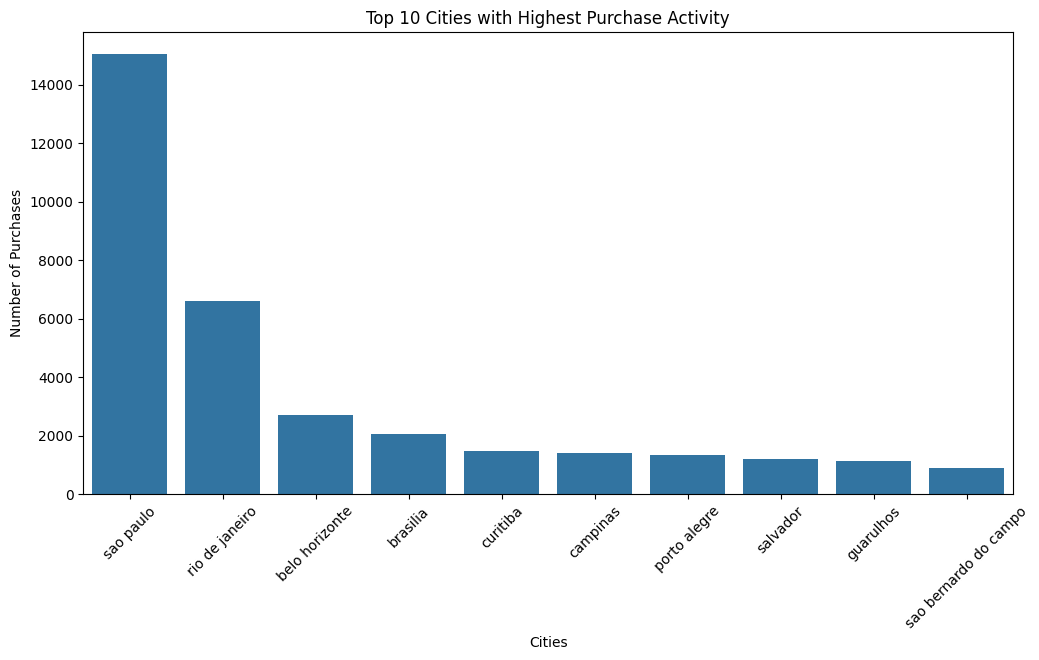

In [ ]:
# Filter for successful orders
successful_orders = orders_df[orders_df['order_status'] == 'delivered']

# Merge with customer data to get city information
order_city_data = pd.merge(successful_orders, customer_df, on='customer_id')

# Group by city and count the number of purchases
top_cities = order_city_data.groupby('customer_city').size().sort_values(ascending=False).head(10)

# Plotting the top cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with Highest Purchase Activity')
plt.xlabel('Cities')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

## Conclusion

**1st Question :** Which is the Highest Frequency on Buying Customer by City in our E-Commerce?

In [ ]:
# Filter for successful orders
successful_orders = orders_df[orders_df['order_status'] == 'delivered']

# Merge with customer data to get city information
order_city_data = pd.merge(successful_orders, customer_df, on='customer_id')

# Group by city and count the number of purchases
top_cities = order_city_data.groupby('customer_city').size().sort_values(ascending=False).head(10)
print(top_cities)

customer_city
sao paulo                15045
rio de janeiro            6601
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1342
salvador                  1188
guarulhos                 1144
sao bernardo do campo      911
dtype: int64


The Highest Buyer by City is our Customer from **Sao Paulo**

**2nd Question :** Which is the Top Product and Top Seller in our E -Commerce?

In [ ]:
# Merge DataFrames
merged_df = orderitems_df.merge(products_df, on='product_id', how='left') \
                           .merge(sellers_df, on='seller_id', how='left')

# Calculate total sales per product
top_products = merged_df.groupby('product_id').agg({'price': 'sum'}).reset_index()
top_products.columns = ['product_id', 'total_sales']

# Merge to get product names and categories
top_products = top_products.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Sort and select top 10 products
top_10_products = top_products.sort_values(by='total_sales', ascending=False).head(10)

# Calculate total sales per seller
top_sellers = merged_df.groupby('seller_id').agg({'price': 'sum'}).reset_index()
top_sellers.columns = ['seller_id', 'total_sales']

# Merge to get seller cities and states
top_sellers = top_sellers.merge(sellers_df[['seller_id', 'seller_city', 'seller_state']], on='seller_id', how='left')

# Sort and select top 10 sellers
top_10_sellers = top_sellers.sort_values(by='total_sales', ascending=False).head(10)

# Display the results
print("Top 10 Products:")
print(top_10_products[['product_category_name', 'total_sales']])

Top 10 Products:
        product_category_name  total_sales
24086            beleza_saude     63885.00
14068            beleza_saude     54730.20
27613                     pcs     48899.34
27039  informatica_acessorios     47214.51
19742         cama_mesa_banho     43025.56
8051   informatica_acessorios     41082.60
4996                    bebes     38907.32
12351              cool_stuff     37733.90
10867      relogios_presentes     37683.42
22112        moveis_decoracao     37608.90


In [ ]:
print("\nTop 10 Sellers:")
print(top_10_sellers[['seller_id','seller_city', 'seller_state', 'total_sales']])


Top 10 Sellers:
                             seller_id       seller_city seller_state  \
857   4869f7a5dfa277a7dca6462dcf3b52b2           guariba           SP   
1013  53243585a1d6dc2643021fd1853d8905  lauro de freitas           BA   
881   4a3ca9315b744ce9f8e9374361493884          ibitinga           SP   
3024  fa1c13f2614d7b5c4749cbc52fecda94            sumare           SP   
1535  7c67e1448b00f6e969d365cea6b010ab   itaquaquecetuba           SP   
1560  7e93a43ef30c4f03f38b393420bc753a           barueri           SP   
2643  da8622b14eb17ae2831f4ac5b9dab84a        piracicaba           SP   
1505  7a67c85e85bb2ce8582c35f2203ad736         sao paulo           SP   
192   1025f0e2d44d7041d6cf58b6550e0bfa         sao paulo           SP   
1824  955fee9216a65b617aa5c0531780ce60         sao paulo           SP   

      total_sales  
857     229472.63  
1013    222776.05  
881     200472.92  
3024    194042.03  
1535    187923.89  
1560    176431.87  
2643    160236.57  
1505    141745.53  

The Top Product is **Beleza Saude** with the Number of *63885*

The Top Seller is from **Guariba** City with the ID of **4869f7a5dfa277a7dca6462dcf3b52b2** reaching the total Sales of *229472* items

**3rd Question :** How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?

In [ ]:
# Convert to datetime if not already
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Filter for delivered orders and calculate the time taken
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days

# Summary statistics on delivery time
delivery_summary = delivered_orders['delivery_duration'].describe()

# Calculate min and max delivery durations
min_delivery_time = delivered_orders['delivery_duration'].min()
max_delivery_time = delivered_orders['delivery_duration'].max()

# Define efficiency thresholds (close to minimum is considered efficient)
threshold_min = min_delivery_time + (max_delivery_time - min_delivery_time) * 0.25  # Top 25% efficient
threshold_max = max_delivery_time - (max_delivery_time - min_delivery_time) * 0.25  # Bottom 25% inefficient

# Count the number of deliveries in each efficiency category
efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= threshold_min].shape[0]
inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] >= threshold_max].shape[0]
total_deliveries = delivered_orders.shape[0]

# Calculate the efficiency percentages for efficient and inefficient deliveries
efficient_percentage = (efficient_deliveries / total_deliveries) * 100
inefficient_percentage = (inefficient_deliveries / total_deliveries) * 100

# General efficiency rates based on average delivery time
average_delivery_time = delivery_summary['mean']
general_efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= average_delivery_time].shape[0]
general_inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] > average_delivery_time].shape[0]

# Calculate the general efficiency percentages
general_efficient_percentage = (general_efficient_deliveries / total_deliveries) * 100
general_inefficient_percentage = (general_inefficient_deliveries / total_deliveries) * 100

C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1511412117.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days


In [ ]:
print(f"Minimum Delivery Time: {min_delivery_time} days")
print(f"Maximum Delivery Time: {max_delivery_time} days")
print(f"Efficient Deliveries (Top 25%): {efficient_percentage:.2f}%")
print(f"Inefficient Deliveries (Bottom 25%): {inefficient_percentage:.2f}%")

print(f"Average Delivery Time: {average_delivery_time:.2f} days")
print(f"General Efficient Deliveries (Faster than or equal to average): {general_efficient_percentage:.2f}%")
print(f"General Inefficient Deliveries (Slower than average): {general_inefficient_percentage:.2f}%")

Minimum Delivery Time: 0.0 days
Maximum Delivery Time: 209.0 days
Efficient Deliveries (Top 25%): 99.45%
Inefficient Deliveries (Bottom 25%): 0.02%
Average Delivery Time: 12.09 days
General Efficient Deliveries (Faster than or equal to average): 64.14%
General Inefficient Deliveries (Slower than average): 35.85%


Our Product Efficiency is **64.14%** with the average of **12 Days**

**4th Question :**  Which Payment Method used in Buying the Items in our E-Commerce?

In [ ]:
# Group by payment type and count occurrences
payment_methods = payment_df.groupby('payment_type').size().sort_values(ascending=False)

print(payment_methods)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64


Most used Payment is **Credit Card**

**5th Question :**  When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?

In [ ]:
# Extract hour from purchase timestamp
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour

# Group by hour to see purchase activity
purchase_activity = orders_df.groupby('purchase_hour').size()

# Find the Prime Time (hour with the highest purchase activity)
prime_time_hour = purchase_activity.idxmax()
prime_time_count = purchase_activity.max()

# Find the Dead Time (hour with the lowest purchase activity)
dead_time_hour = purchase_activity.idxmin()
dead_time_count = purchase_activity.min()


# Display the Prime Time and Dead Time
print(f"The Customer Prime Time: {prime_time_hour}:00 with {prime_time_count} purchases.")
print(f"The Customer Dead Time: {dead_time_hour}:00 with {dead_time_count} purchases.")

The Customer Prime Time: 16:00 with 6675 purchases.
The Customer Dead Time: 5:00 with 188 purchases.


**6th Question :** How big is the Purchase Growth on this E-Commerce?

In [ ]:
# Extract year and month from purchase timestamp
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Group by month and count the number of orders
purchase_growth = orders_df.groupby('purchase_month').size()

# Calculate the percentage change from month to month
monthly_percentage_change = purchase_growth.pct_change() * 100

# Calculate the overall percentage growth or decline
initial_orders = purchase_growth.iloc[0]  # Orders in the first month
final_orders = purchase_growth.iloc[-2]   # Orders in the last of the second month

overall_percentage_change = ((final_orders - initial_orders) / initial_orders) * 100

print(f"Overall Purchase Growth from first to last month: {overall_percentage_change:.2f}%")

Overall Purchase Growth from first to last month: 300.00%


The Purchase Growth is Surging to **300%**

##### Final Conclusion
- Which is the Highest Frequency on Buying Customer by City in our E-Commerce?
    - The Largest Buyer by City is **Sao Paulo**, this research concludes that we need to increasing our **Customer Service Quality** in some of the highest rating City, for other cities will be focusing on expanding our E - Commerce uses because the gap between The Highest and other city is pretty big , also we need more newer data to see our Selling Activities
- Which is the Top Product and Top Seller in our E -Commerce?
    - The Top Product for our E - Commerce is **Beleza Saude**, this conclusion will help us to giving some strategies to maintain and growing our product selling through several strategies (Voucher, Discount, Prime Time buying, etc.)
    - The Top Seller for our E - Commerce is from **Guariba** City with the ID of **4869f7a5dfa277a7dca6462dcf3b52b2** reaching the total Sales of *229472* items, from this insight also will helping us to analyze potential Sellers that we can synergize in terms of Production and Delivery to increasing Budget Efficiency
- How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?
    - Our Product Efficiency is **64.14%** with the average of **12 Days**, its showing that we still need to improve our Delivery by Maximizing Warehouse Location
- Which Payment Method used in Buying the Items in our E-Commerce?
    - Most used Payment is **Credit Card**, this research concludes that we need to increasing our Credit Card payment variety with several bank to Maintaining our Payment Flow, other important things is to maintain our System so it doesnt face any Error
-  When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?
    - The Customer Prime Time is **16:00** with **6675** purchases.
    - The Customer Dead Time is **5:00** with **188** purchases.
    - This Data will be Helpfull on Creating Strategy for Maximizing our Sellings (ie. Live Selling, Discount Hours, etc.)
- How big is the Purchase Growth on this E-Commerce?
    - Overall Purchase Growth from first to last month is **300.00%**
    - This is showing a Very Healthy growth from our E - Commerce
    - THe problem occured is the data incompleteness on the last 2 Months, so we have to improve it